In [50]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [51]:
data = pd.read_csv("Car_sales.csv")

data.head(20)

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
5,Audi,A6,18.780,23.555,Passenger,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,8/9/2011,84.565105
6,Audi,A8,1.380,39.000,Passenger,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,2/27/2012,134.656858
7,BMW,323i,19.747,NaN,Passenger,26.990,2.5,170.0,107.3,68.4,176.0,3.179,16.6,26.0,6/28/2011,71.191207
8,BMW,328i,9.231,28.675,Passenger,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,1/29/2012,81.877069
9,BMW,528i,17.527,36.125,Passenger,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,25.0,4/4/2011,83.998724


In [52]:
data.describe()

,Sales_in_thousands,__year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,157.000000,121.000000,155.000000,156.000000,156.000000,156.000000,156.000000,156.000000,155.000000,156.000000,154.000000,155.000000
mean,52.998076,18.072975,27.390755,3.060897,185.948718,107.487179,71.150000,187.343590,3.378026,17.951923,23.844156,77.043591
std,68.029422,11.453384,14.351653,1.044653,56.700321,7.641303,3.451872,13.431754,0.630502,3.887921,4.282706,25.142664
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,14.114000,11.260000,18.017500,2.300000,149.500000,103.000000,68.400000,177.575000,2.971000,15.800000,21.000000,60.407707
50%,29.450000,14.180000,22.799000,3.000000,177.500000,107.000000,70.550000,187.900000,3.342000,17.200000,24.000000,72.030917
75%,67.956000,19.875000,31.947500,3.575000,215.000000,112.200000,73.425000,196.125000,3.799500,19.575000,26.000000,89.414878
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         157 non-null    object 
 1   Model                157 non-null    object 
 2   Sales_in_thousands   157 non-null    float64
 3   __year_resale_value  121 non-null    float64
 4   Vehicle_type         157 non-null    object 
 5   Price_in_thousands   155 non-null    float64
 6   Engine_size          156 non-null    float64
 7   Horsepower           156 non-null    float64
 8   Wheelbase            156 non-null    float64
 9   Width                156 non-null    float64
 10  Length               156 non-null    float64
 11  Curb_weight          155 non-null    float64
 12  Fuel_capacity        156 non-null    float64
 13  Fuel_efficiency      154 non-null    float64
 14  Latest_Launch        157 non-null    object 
 15  Power_perf_factor    155 non-null    flo

In [62]:
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117 entries, 0 to 149
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         117 non-null    object 
 1   Model                117 non-null    object 
 2   Sales_in_thousands   117 non-null    float64
 3   __year_resale_value  117 non-null    float64
 4   Vehicle_type         117 non-null    object 
 5   Price_in_thousands   117 non-null    float64
 6   Engine_size          117 non-null    float64
 7   Horsepower           117 non-null    float64
 8   Wheelbase            117 non-null    float64
 9   Width                117 non-null    float64
 10  Length               117 non-null    float64
 11  Curb_weight          117 non-null    float64
 12  Fuel_capacity        117 non-null    float64
 13  Fuel_efficiency      117 non-null    float64
 14  Latest_Launch        117 non-null    object 
 15  Power_perf_factor    117 non-null    flo

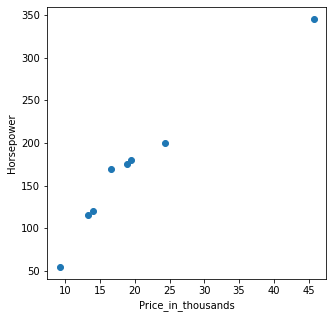

In [55]:
data1 = data[data["Manufacturer"] == "Chevrolet"]
x = np.array(data1["Price_in_thousands"]).reshape(-1,1)
y = np.array(data1["Horsepower"]).reshape(-1,1)

plt.figure(figsize = [5,5])
plt.scatter(x = x, y = y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()

R^2 Score:  0.9490963527191884


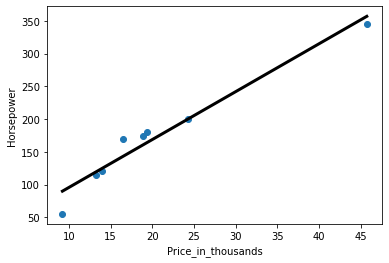

In [56]:
reg = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)

reg.fit(x, y)

print('R^2 Score: ',reg.score(x,y))

predicted = reg.predict(predict_space)

plt.plot(predict_space, predicted, color = "black", linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()

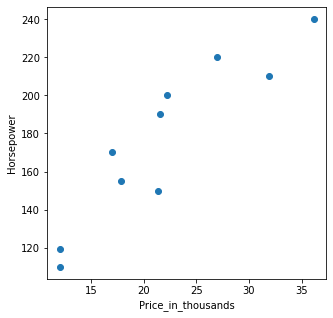

In [57]:
data2 = data[data["Manufacturer"] == "Ford"]
x = np.array(data2["Price_in_thousands"]).reshape(-1,1)
y = np.array(data2["Horsepower"]).reshape(-1,1)

plt.figure(figsize = [5,5])
plt.scatter(x = x, y = y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()

R^2 Score:  0.8411791377290182


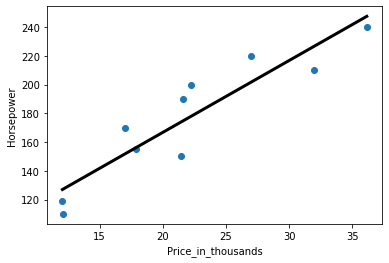

In [58]:
reg = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)

reg.fit(x, y)

print('R^2 Score: ', reg.score(x,y))

predicted = reg.predict(predict_space)

plt.plot(predict_space, predicted, color = "black", linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()

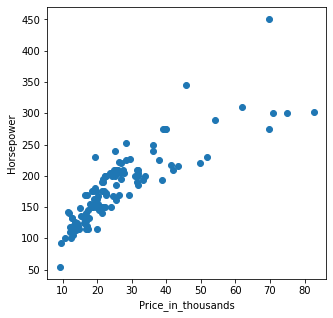

In [60]:
x = np.array(data["Price_in_thousands"]).reshape(-1,1)
y = np.array(data["Horsepower"]).reshape(-1,1)

plt.figure(figsize = [5,5])
plt.scatter(x = x, y = y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()

R^2 Score:  0.7283856887182095


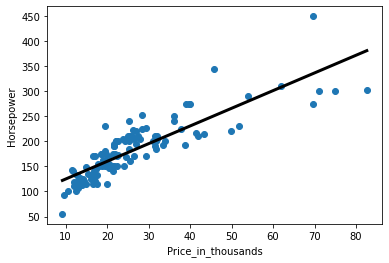

In [61]:
reg = LinearRegression()

predict_space = np.linspace(min(x),max(x)).reshape(-1,1)

reg.fit(x, y)

print('R^2 Score: ', reg.score(x,y))

predicted = reg.predict(predict_space)

plt.plot(predict_space, predicted, color = "black", linewidth=3)
plt.scatter(x=x,y=y)
plt.xlabel("Price_in_thousands")
plt.ylabel("Horsepower")
plt.show()